In [2]:
import random
import sys

import numpy as np
import matplotlib.pyplot as plt
from itertools import compress

# Bokeh imports
from bokeh.io import output_notebook, show, save
from bokeh.plotting import figure, output_file, ColumnDataSource, reset_output
from bokeh.models import HoverTool
output_notebook()

from ipywidgets.widgets import Text

#scipy constants
from scipy.constants import Boltzmann as kB
from scipy.constants import Avogadro as NA
from scipy.constants import Planck as h
from scipy.constants import speed_of_light as c0
from scipy.constants import R

sys.path.append('../CNT-SIM/')
from CNTSimFile import CNTSimFile
from mc_sim import exciton_sim

Loading BokehJS ...

# raise k_er; raise k_dnr/k_enr

In [5]:
k_er_per_s = 1e8
k_br_per_s = 1e8  # constant for radiativ decay from S11*
k_enr_per_s = 2e8 
k_bnr_per_s = 4e8   # constant for non-radiativ decay from S11*

k_de_per_s = 1e8  # constant for going from dark to S11 state
k_ed_per_s = 1e8  # constant for going from S11 to dark statestate

# termal detrapping 10.1021/acs.jpclett.8b03732
k_bd_per_s = 0.5 * (1e12 / 385 + 1e12 / 1132) + 0.1e12 * np.exp(-1.6182e-11 /
                                                                (kB * 300))
k_dnr_per_s = 2e8

kin_const_1 = np.array([k_br_per_s, k_er_per_s, k_bnr_per_s, k_enr_per_s, k_bd_per_s, k_ed_per_s,
                        k_de_per_s, k_dnr_per_s])

Pristine CNT

In [6]:
exc_sim_rk_1 = CNTSimFile('../sim_output/2020-09-25-exciton_sim-rate-const_prist_1.h5', kin_const_1)

Existing file loaded successfully.


../CNT-SIM/CNTSimFile.py:31: UserWarning: File already exists, kinetic constants ingored.
  warn("File already exists, kinetic constants ingored.")


In [7]:
exc_sim_rk_1.calc_dict.keys()

dict_keys(['CNT_length', 'Diff_const', 'chosen_const', 'constant_array', 'constant_dependence', 'constant_names', 'date', 'function', 'method', 'n_defects', 'n_photons', 'r_exc_nm', 't_step'])

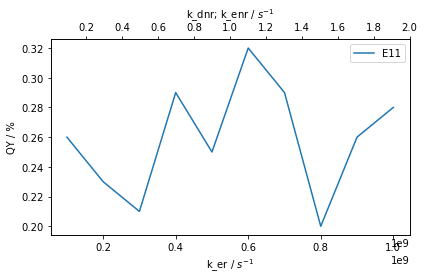

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_1.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_1.calc_dict['constant_dependence'][:, 0], exc_sim_rk_1.QY[:, 1]*100, label='E11')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

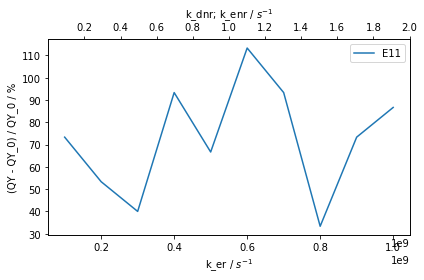

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_1.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_1.calc_dict['constant_dependence'][:, 0], exc_sim_rk_1.QY_delta[:, 1]*100, label='E11')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('(QY - QY_0) / QY_0 / %')
ax1.legend()
plt.tight_layout()

30 defects CNT

In [30]:
exc_sim_rk_2 = CNTSimFile('../sim_output/2020-09-25-exciton_sim-rate-const_defected_2.h5', kin_const_1)

Existing file loaded successfully.


../CNT-SIM/CNTSimFile.py:31: UserWarning: File already exists, kinetic constants ingored.
  warn("File already exists, kinetic constants ingored.")


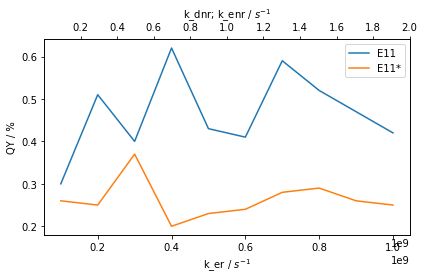

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_2.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_2.calc_dict['constant_dependence'][:, 0], exc_sim_rk_2.QY[:, 1]*100, label='E11')
ax1.plot(exc_sim_rk_2.calc_dict['constant_dependence'][:, 0], exc_sim_rk_2.QY[:, 0]*100, label='E11*')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

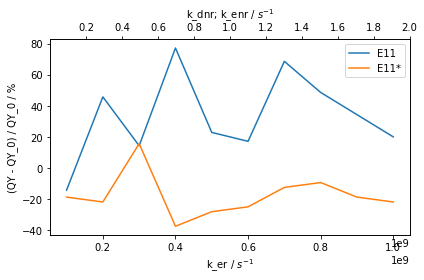

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_2.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_2.calc_dict['constant_dependence'][:, 0], exc_sim_rk_2.QY_delta[:, 1]*100, label='E11')
ax1.plot(exc_sim_rk_2.calc_dict['constant_dependence'][:, 0], exc_sim_rk_2.QY_delta[:, 0]*100, label='E11*')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('(QY - QY_0) / QY_0 / %')
ax1.legend()
plt.tight_layout()

### Higher k_nr rates

In [35]:
exc_sim_rk_3 = CNTSimFile('../sim_output/2020-09-25-exciton_sim-rate-const_prist_3.h5', kin_const_1)

Existing file loaded successfully.


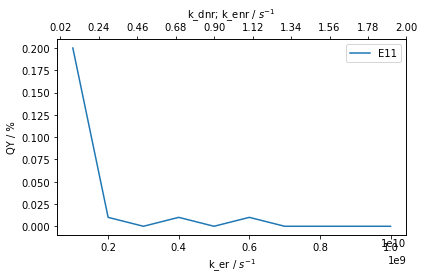

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_3.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_3.calc_dict['constant_dependence'][:, 0], exc_sim_rk_3.QY[:, 1]*100, label='E11')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

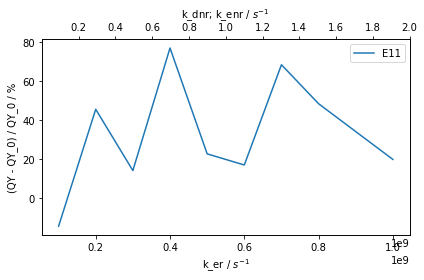

In [37]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_2.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_2.calc_dict['constant_dependence'][:, 0], exc_sim_rk_2.QY_delta[:, 1]*100, label='E11')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('(QY - QY_0) / QY_0 / %')
ax1.legend()
plt.tight_layout()

In [38]:
exc_sim_rk_4 = CNTSimFile('../sim_output/2020-09-25-exciton_sim-rate-const_defected_4.h5', kin_const_1)

Existing file loaded successfully.


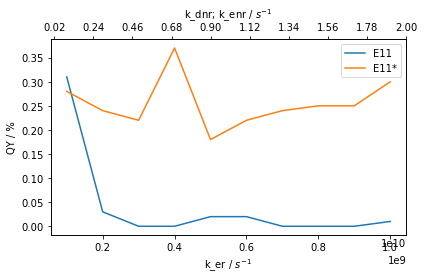

In [40]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_4.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_4.calc_dict['constant_dependence'][:, 0], exc_sim_rk_4.QY[:, 1]*100, label='E11')
ax1.plot(exc_sim_rk_4.calc_dict['constant_dependence'][:, 0], exc_sim_rk_4.QY[:, 0]*100, label='E11*')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

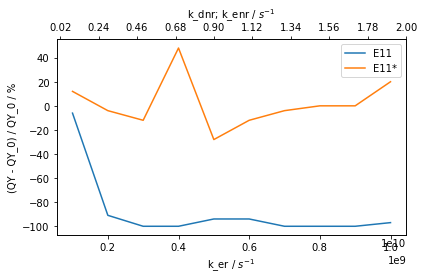

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_4.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_4.calc_dict['constant_dependence'][:, 0], exc_sim_rk_4.QY_delta[:, 1]*100, label='E11')
ax1.plot(exc_sim_rk_4.calc_dict['constant_dependence'][:, 0], exc_sim_rk_4.QY_delta[:, 0]*100, label='E11*')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('(QY - QY_0) / QY_0 / %')
ax1.legend()
plt.tight_layout()

### higher k_er

In [43]:
exc_sim_rk_5 = CNTSimFile('../sim_output/2020-09-25-exciton_sim-rate-const_prist_5.h5', kin_const_1)

Existing file loaded successfully.


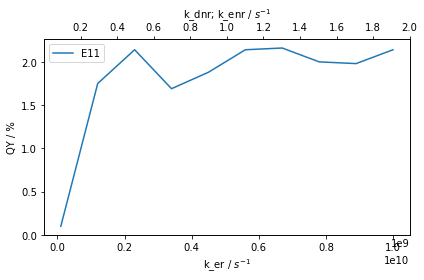

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_5.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_5.calc_dict['constant_dependence'][:, 0], exc_sim_rk_5.QY[:, 1]*100, label='E11')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

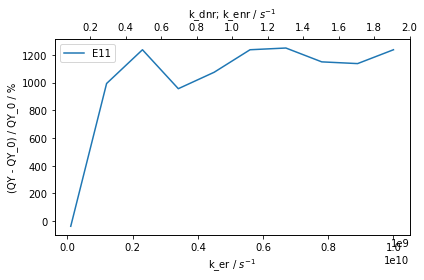

In [45]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_5.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_5.calc_dict['constant_dependence'][:, 0], exc_sim_rk_5.QY_delta[:, 1]*100, label='E11')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('(QY - QY_0) / QY_0 / %')
ax1.legend()
plt.tight_layout()

In [46]:
exc_sim_rk_6 = CNTSimFile('../sim_output/2020-09-25-exciton_sim-rate-const_defected_6.h5', kin_const_1)

Existing file loaded successfully.


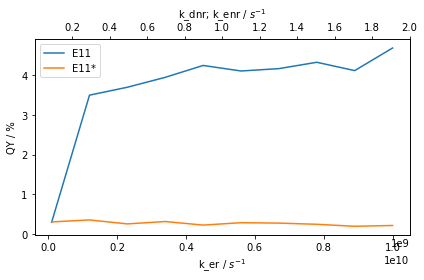

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_6.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_6.calc_dict['constant_dependence'][:, 0], exc_sim_rk_6.QY[:, 1]*100, label='E11')
ax1.plot(exc_sim_rk_6.calc_dict['constant_dependence'][:, 0], exc_sim_rk_6.QY[:, 0]*100, label='E11*')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

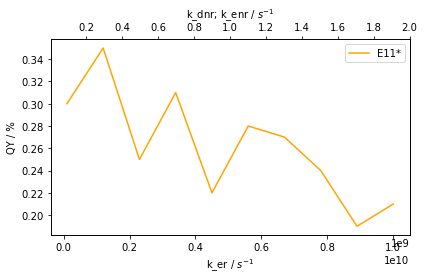

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_6.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_6.calc_dict['constant_dependence'][:, 0], exc_sim_rk_6.QY[:, 0]*100, label='E11*',
        color='orange')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

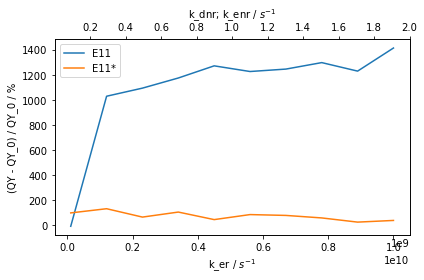

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_6.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_6.calc_dict['constant_dependence'][:, 0], exc_sim_rk_6.QY_delta[:, 1]*100, label='E11')
ax1.plot(exc_sim_rk_6.calc_dict['constant_dependence'][:, 0], exc_sim_rk_6.QY_delta[:, 0]*100, label='E11*')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('(QY - QY_0) / QY_0 / %')
ax1.legend()
plt.tight_layout()

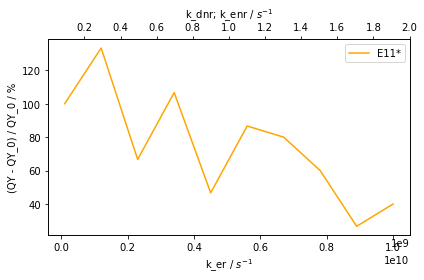

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_6.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_dnr; k_enr / $s^{-1}$')
ax1.plot(exc_sim_rk_6.calc_dict['constant_dependence'][:, 0], exc_sim_rk_6.QY_delta[:, 0]*100, label='E11*',
        color='orange')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('(QY - QY_0) / QY_0 / %')
ax1.legend()
plt.tight_layout()